In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Getting Data
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Exploratory Analysis

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


C:\Users\anshul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\anshul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\anshul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\anshul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Male')

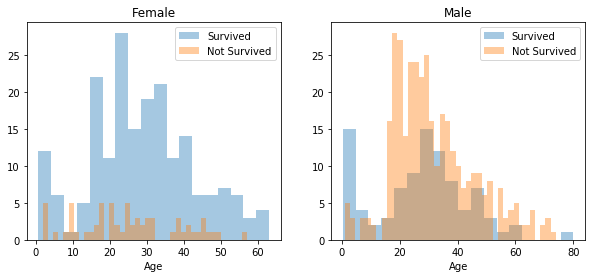

In [10]:
#1.Age and Sex

fig, axes = plt.subplots(ncols=2 , nrows=1 , figsize=(10,4))
women = train_data[train_data['Sex'] == 'female']
men = train_data[train_data['Sex'] == 'male']
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna() , bins=18 , label='Survived' , ax=axes[0] , kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna() , bins=40 , label='Not Survived' , ax=axes[0] , kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived'] == 1].Age.dropna() , bins=18 , label='Survived' , ax=axes[1] , kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna() , bins=40 , label='Not Survived' , ax=axes[1] , kde=False)
ax.legend()
ax.set_title('Male')

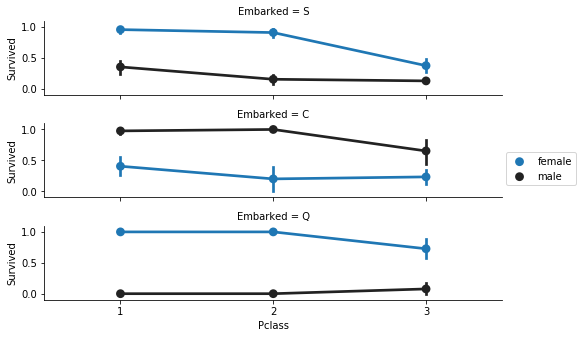

In [11]:
#2.Embarked, Pclass and Sex

FacetGrid = sns.FacetGrid(train_data , row='Embarked' , aspect=4.5 , size=1.6)
FacetGrid.map(sns.pointplot , 'Pclass' , 'Survived' , 'Sex' , palette=None , order=None , hue_order=None)
FacetGrid.add_legend()

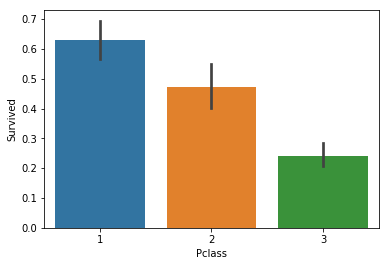

In [12]:
#3. Pclass
sns.barplot(x='Pclass' , y='Survived' , data=train_data)

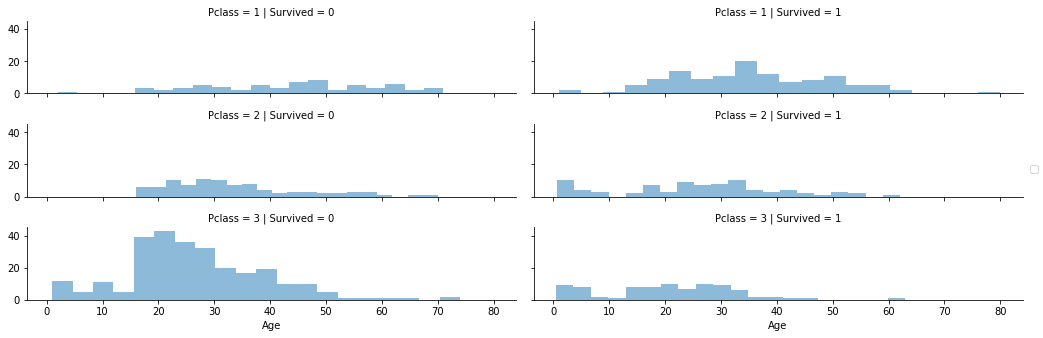

In [14]:
grid = sns.FacetGrid(train_data , row='Pclass' , col='Survived' , aspect=4.5 , size=1.6)
grid.map(plt.hist , 'Age' , alpha=.5 , bins=20)
grid.add_legend()

In [16]:
#5.SibSp and Parch

data = [train_data , test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives']>0 , 'not alone'] = 1
    dataset.loc[dataset['relatives']==0 , 'not alone'] = 0
    
    dataset['not alone'] = dataset['not alone'].astype(int)

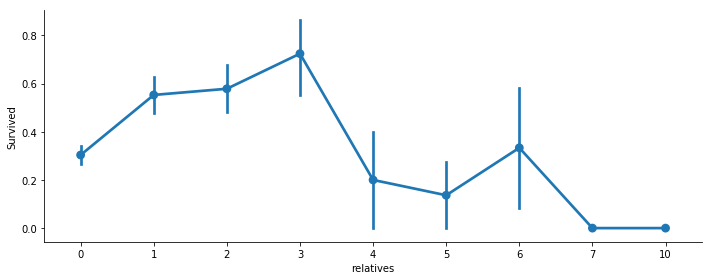

In [21]:
axes = sns.factorplot('relatives' , 'Survived', data=train_data , aspect=2.5)

In [22]:
#Data Preprocessing

In [23]:
train_data = train_data.drop(['PassengerId'], axis=1)

In [24]:
train_data = train_data.drop(['Cabin'],axis=1)

In [28]:
#1. Age
data = [train_data , test_data]

for dataset in data:
    mean = train_data['Age'].mean()
    std = test_data['Age'].std()
    
    isnull = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean-std , mean+std , size=isnull)
    age_v = dataset['Age'].copy()
    age_v[np.isnan(age_v)] = rand_age
    
    dataset['Age'] = age_v
    dataset['Age'] = train_data['Age'].astype(int)

In [30]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [31]:
data = [train_data , test_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [32]:
#Converting Features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not alone    891 non-null int32
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 76.6+ KB


In [33]:
#1.Fare
data = [train_data , test_data]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [34]:
#2.Name
data = [train_data , test_data]
titles = {'Mr':1 , 'Mrs':2 , 'Miss':3 , 'Master':4 , 'Rare':5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
    

In [35]:
train_data = train_data.drop(['Name'],axis=1)
test_data = test_data.drop(['Name'],axis=1)

In [36]:
#3.Sex

data = [train_data , test_data]
genders = {'male':0 , 'female':1}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [37]:
train_data = train_data.drop(['Ticket'],axis=1)
test_data = test_data.drop(['Ticket'] , axis=1)

In [38]:
ports={'S':0 , 'C':1 , 'Q':2}
data = [train_data , test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [39]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not alone,Title
0,0,3,0,22,1,0,7,0,1,1,1
1,1,1,1,38,1,0,71,1,1,1,2
2,1,3,1,26,0,0,7,0,0,0,3
3,1,1,1,35,1,0,53,0,1,1,2
4,0,3,0,35,0,0,8,0,0,0,1


In [40]:
#Creating Categories
#1.Age

data = [train_data , test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] >11) & (dataset['Age'] <= 18) , 'Age'] = 1
    dataset.loc[(dataset['Age'] >18) & (dataset['Age'] <= 22) , 'Age'] = 2
    dataset.loc[(dataset['Age'] >22) & (dataset['Age'] <= 27) , 'Age'] = 3
    dataset.loc[(dataset['Age'] >27) & (dataset['Age'] <= 33) , 'Age'] = 4
    dataset.loc[(dataset['Age'] >33) & (dataset['Age'] <= 40) , 'Age'] = 5
    dataset.loc[(dataset['Age'] >40),'Age'] = 6

In [41]:
#2. Fare

data = [train_data , test_data]
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91 , 'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare'] <= 14.454) , 'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare'] <= 31) , 'Fare'] = 2
    dataset.loc[(dataset['Fare']>31) & (dataset['Fare'] <= 99) , 'Fare'] = 3
    dataset.loc[(dataset['Fare']>99) & (dataset['Fare'] <= 250) , 'Fare'] = 4
    dataset.loc[(dataset['Fare']>250)  , 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    

In [42]:
#Creating New Features
#1. Age times Class

data = [train_data , test_data]
for dataset in data:
    dataset['Age_class'] = dataset['Age'] * dataset['Pclass']

In [45]:
#2. Fare Per Person

data = [train_data , test_data]
for dataset in data:
    dataset['FarePP'] = dataset['Fare'] / (dataset['relatives']+1)
    dataset['FarePP'] = dataset['FarePP'].astype(int)
    
    

In [46]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not alone,Title,Age_class,FarePP
0,0,3,0,2,1,0,0,0,1,1,1,6,0
1,1,1,1,5,1,0,3,1,1,1,2,5,1
2,1,3,1,3,0,0,0,0,0,0,3,9,0
3,1,1,1,5,1,0,3,0,1,1,2,5,1
4,0,3,0,5,0,0,1,0,0,0,1,15,1


In [47]:
#Building Machine Learning Models

In [52]:
X_train = train_data.drop(['Survived'] , axis=1)
Y_train = train_data['Survived']
X_test = test_data.drop(['PassengerId'],axis=1).copy()
X_test = X_test.drop(['Cabin'] , axis=1)

In [53]:
#SGD
sgd = SGDClassifier(max_iter=5 , tol=None)
sgd.fit(X_train , Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train , Y_train)
acc_sgd = round(sgd.score(X_train , Y_train)*100 , 2)

In [56]:
#RandomForest
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train , Y_train)

Y_pred = randomForest.predict(X_test)
randomForest.score(X_train , Y_train)
acc_randomForest = round(randomForest.score(X_train , Y_train)*100 , 2)

In [57]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train , Y_train)

Y_pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_train , Y_train)*100 , 2)

In [58]:
#KNearestNeighbour
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train , Y_train)

Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train , Y_train)*100 , 2)

In [59]:
#GaussianNaiveBayes
Gnb = GaussianNB()
Gnb.fit(X_train , Y_train)
Y_pred = Gnb.predict(X_test)

acc_Gnb = round(Gnb.score(X_train , Y_train)*100,2)

In [63]:
#Perceptron
percep = Perceptron(max_iter=5)
percep.fit(X_train , Y_train)
Y_pred = percep.predict(X_test)

acc_percep = round(percep.score(X_train ,Y_train)*100 ,2)

In [64]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [65]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [69]:
results = pd.DataFrame({
    'Model' : ['SGD' , 'RFC' , 'LOGREG' , 'KNN' , 'GNB' , 'PERCEPTRON' , 'LINSVM' , 'DT'],
    'Score' : [acc_sgd , acc_randomForest , acc_logreg , acc_knn , acc_Gnb , acc_percep , acc_linear_svc ,acc_decision_tree]
})

In [70]:
results = results.sort_values(by='Score' , ascending=False)

In [71]:
results

,Model,Score
1,RFC,90.68
7,DT,90.68
3,KNN,86.76
2,LOGREG,81.14
6,LINSVM,80.92
5,PERCEPTRON,79.57
4,GNB,79.12
0,SGD,72.39


In [72]:
#K Fold Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf , X_train , Y_train , cv=10 , scoring='accuracy')


In [76]:
print("Scores : ", scores)
print("Scores Mean : ", scores.mean())
print("Scores Std : ",scores.std())

Scores :  [0.73333333 0.83333333 0.75280899 0.82022472 0.87640449 0.85393258
 0.84269663 0.7752809  0.83146067 0.81818182]
Scores Mean :  0.813765747361253
Scores Std :  0.04335595391727212


In [77]:
importances = pd.DataFrame({'Feature' : X_train.columns , 'importance' : np.round(randomForest.feature_importances_,3)})

In [80]:
importances = importances.sort_values(by='importance' , ascending=False).set_index('Feature')

In [81]:
importances

,importance
Feature,
Title,0.242
Sex,0.153
Age_class,0.109
Pclass,0.085
Fare,0.080
Age,0.077
relatives,0.067
Embarked,0.058
FarePP,0.046


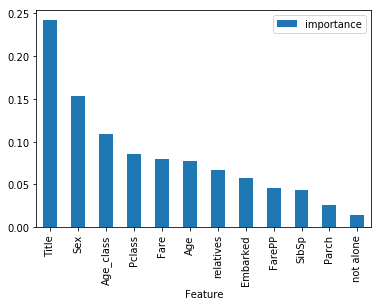

In [83]:
importances.plot.bar()

In [87]:
X_train = X_train.drop(['not alone' , 'Parch'] , axis=1)

In [88]:
X_test = X_test.drop(['not alone' , 'Parch'] , axis=1)

In [90]:
#Training Random Forest Again
rf = RandomForestClassifier(n_estimators=100 , oob_score=True)
rf.fit(X_train , Y_train)

Y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_train , Y_train)*100 , 2)

In [92]:
print(acc_rf,"%")

90.68 %


In [93]:
print("oob score", round(rf.oob_score_,4)*100,"%")

oob score 81.37 %


In [95]:
#Furthur Evaluation
#Confusion Matrix


In [96]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rf , X_train , Y_train , cv=3)

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train , predictions)

array([[482,  67],
       [105, 237]], dtype=int64)

In [98]:
#Precision and Recall
from sklearn.metrics import precision_score, recall_score

In [99]:
print("Precision Score : ",precision_score(Y_train, predictions))
print("Recall Score : ",recall_score(Y_train, predictions))

Precision Score :  0.7796052631578947
Recall Score :  0.6929824561403509


In [100]:
#F-score
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7337461300309597

In [101]:
from sklearn.metrics import precision_recall_curve

y_scores = rf.predict_proba(X_train)
y_scores = y_scores[:,1]

In [102]:
precision , recall , threshold = precision_recall_curve(Y_train , y_scores)

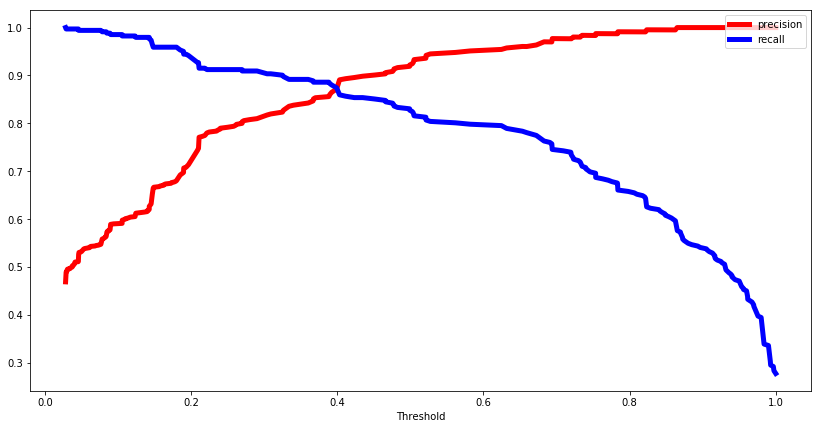

In [103]:
plt.figure(figsize=(14,7))
plt.plot(threshold , precision[:-1] , "r-" , label="precision" , linewidth=5)
plt.plot(threshold , recall[:-1] , "b" , label="recall" , linewidth=5)
plt.xlabel("Threshold")
plt.legend(loc='upper right')
plt.show()

In [104]:
#Roc Auc Curve

In [105]:
from sklearn.metrics import roc_curve

In [107]:
fpr,tpr,thresh = roc_curve(Y_train, y_scores)

[0, 1, 0, 1]

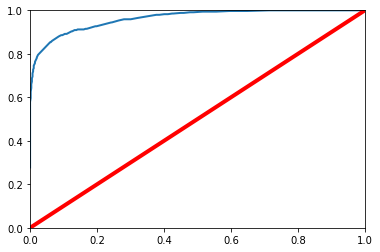

In [108]:
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],"r",linewidth=4)
plt.axis([0,1,0,1])

In [109]:
#ROC AUC Score

In [110]:
from sklearn.metrics import roc_auc_score
rascore = roc_auc_score(Y_train , y_scores)
print("ROC AUC Score :-", rascore)

ROC AUC Score :- 0.9629949189914677
